<a href="https://colab.research.google.com/github/jesua187/ReconocimientoPatrones/blob/main/InvCorta2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Investigación Corta II***

El objetivo consiste en crear una notebook,
donde a partir de un dataset de su elección, pueda llevar a cabo diferentes técnicas de pre-procesado, así
como análisis exploratorio de los datos. Debe tener como mínimo las siguientes técnicas (no se limita a
estos):
- Aplicación de normalización o estandarización de datos.
- Técnica de sustitución de valores faltantes.
- Técnica de detección/eliminación de outliers.
- Análisis exploratorio de datos. 

se hace uso del dataset "
Breast Cancer Data Set", el cual se puede obtener y detallar en este sitio: http://archive.ics.uci.edu/ml/datasets/Breast+Cancer

Primeramente procedemos a cargar las librerias necesarias:

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Se procede a cargar el archivo csv que contiene la data:

In [3]:
breast_cancer = pd.read_csv("breast-cancer.data")

Visualizamos las primeras lineas con el fin de tener una primera perspectiva de como se ven los datos

In [ ]:
breast_cancer.head

<bound method NDFrame.head of      no-recurrence-events  30-39  premeno  30-34  ...  3   left   left_low no.1
0    no-recurrence-events  40-49  premeno  20-24  ...  2  right   right_up   no
1    no-recurrence-events  40-49  premeno  20-24  ...  2   left   left_low   no
2    no-recurrence-events  60-69     ge40  15-19  ...  2  right    left_up   no
3    no-recurrence-events  40-49  premeno    0-4  ...  2  right  right_low   no
4    no-recurrence-events  60-69     ge40  15-19  ...  2   left   left_low   no
..                    ...    ...      ...    ...  ... ..    ...        ...  ...
280     recurrence-events  30-39  premeno  30-34  ...  2   left    left_up   no
281     recurrence-events  30-39  premeno  20-24  ...  3   left    left_up  yes
282     recurrence-events  60-69     ge40  20-24  ...  1  right    left_up   no
283     recurrence-events  40-49     ge40  30-34  ...  3   left   left_low   no
284     recurrence-events  50-59     ge40  30-34  ...  3   left   left_low   no

[285 rows

Agregando encabezados de las columnas, primeramente se crea un arreglo con los  nombres de las columnas para despues colocarlo en la tabla de datos

In [6]:
column_names =['Class', 'age', 'menopause', 'tumor size', 'inv nodes', 'node caps',
       'deg maling', 'breast', 'breast quad', 'irradiat']

In [7]:
breast_cancer = pd.read_csv("breast-cancer.data", names = column_names)

Se presenta ahora la visualización de la data con las primeras lineas con  su respectivo encabezado

In [ ]:
breast_cancer.head()

,Class,age,menopause,tumor size,inv nodes,node caps,deg maling,breast,breast quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


## ***Analisis Exploratorio de Datos***

Primeramente procedemos a analizar el tipo de datos de los atributos 

In [ ]:
breast_cancer.dtypes

no-recurrence-events    object
30-39                   object
premeno                 object
30-34                   object
0-2                     object
no                      object
3                        int64
left                    object
left_low                object
no.1                    object
dtype: object

Notese que realmente el unico dato númerico(en este caso entero) que se tiene es el grado de malignidad del tumor, sin emnbargo en este punto no se sabe con certeza si los datos son categoricos, para ello se procedera a estudiar con comandos unique and describe, cada atributo 

In [ ]:
pd.unique(breast_cancer['Class'])

array(['no-recurrence-events', 'recurrence-events'], dtype=object)

In [ ]:
breast_cancer['Class'].describe()

count                      286
unique                       2
top       no-recurrence-events
freq                       201
Name: Class, dtype: object

In [ ]:
pd.unique(breast_cancer['age'])

array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object)

Notese que el rango de edades va desde 20 hasta 79, sin embargo los datos no pueden escribirse como un numero exacto, por ende son datos categoricos

In [ ]:
breast_cancer['age'].describe()

count       286
unique        6
top       50-59
freq         96
Name: age, dtype: object

In [ ]:
pd.unique(breast_cancer['menopause'])

array(['premeno', 'ge40', 'lt40'], dtype=object)

In [ ]:
breast_cancer['menopause'].describe()

count         286
unique          3
top       premeno
freq          150
Name: menopause, dtype: object

El atributo menopause tambien corresponde a datos de tipo categorico 

In [ ]:
pd.unique(breast_cancer['tumor size'])

array(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10-14',
       '40-44', '35-39', '5-9', '45-49'], dtype=object)

Notese que el rango de tamaños de tumor va desde 5 hasta 54 sin embargo tambien es un atributo categorico

In [ ]:
pd.unique(breast_cancer['inv nodes'])

array(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10-14',
       '40-44', '35-39', '5-9', '45-49'], dtype=object)

In [ ]:
breast_cancer['inv nodes'].describe()

count     286
unique      7
top       0-2
freq      213
Name: inv nodes, dtype: object

Aca se presenta un atributo categorico binario

In [ ]:
breast_cancer['node caps'].describe()

count     286
unique      3
top        no
freq      222
Name: node caps, dtype: object

In [ ]:
pd.unique(breast_cancer['node caps'])

array(['no', 'yes', '?'], dtype=object)

***Aca se encontraron valores de ? *** Este es un tipo  de categoria binaria, sin embargo presenta valores faltantes, estos datos se deben trabajar antes de ser utilizados, esto realizara en una sección posterior 

In [ ]:
breast_cancer['deg maling'].describe()

count    286.000000
mean       2.048951
std        0.738217
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: deg maling, dtype: float64

In [ ]:
pd.unique(breast_cancer['deg maling'])

array([3, 2, 1])

  El grado de malignidad realmente es un atributo categorico y no variable por tanto los datos estadisticos obtenidos con el comando describe realmente no aportan información valiosa

In [ ]:
breast_cancer['breast'].describe()

count      286
unique       2
top       left
freq       152
Name: breast, dtype: object

In [ ]:
pd.unique(breast_cancer['breast'])

array(['left', 'right'], dtype=object)

Este es un tipo  de categoria binaria

In [ ]:
breast_cancer['breast quad'].describe()

count          286
unique           6
top       left_low
freq           110
Name: breast quad, dtype: object

In [ ]:
pd.unique(breast_cancer['breast quad'])

array(['left_low', 'right_up', 'left_up', 'right_low', 'central', '?'],
      dtype=object)

Este tambien es un atributo categorico 

In [ ]:
breast_cancer['irradiat'].describe()

count      286
unique       2
top       left
freq       152
Name: breast, dtype: object

In [ ]:
pd.unique(breast_cancer['irradiat'])

array(['left', 'right'], dtype=object)

Finalmente este es un tipo  de categoria binaria

### Gráficas de atributos

Se procede a graficar la Clase, es decir cuales pacientes presentan eventos recurrentes o no en funcion de los atributos para con ello ver su correlación

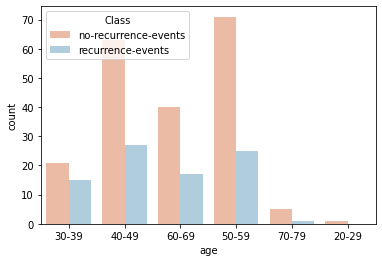

In [ ]:

plt.figure()
sns.countplot(x='age', hue='Class', data=breast_cancer, palette='RdBu')
plt.show()

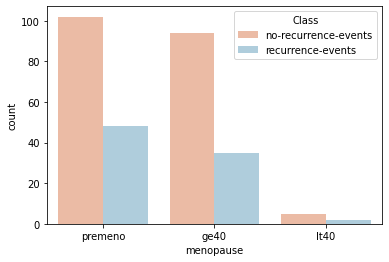

In [ ]:

plt.figure()
sns.countplot(x='menopause', hue='Class', data=breast_cancer, palette='RdBu')
plt.show()

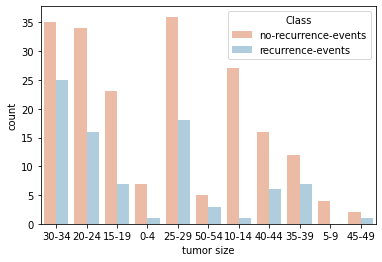

In [ ]:

plt.figure()
sns.countplot(x='tumor size', hue='Class', data=breast_cancer, palette='RdBu')
plt.show()

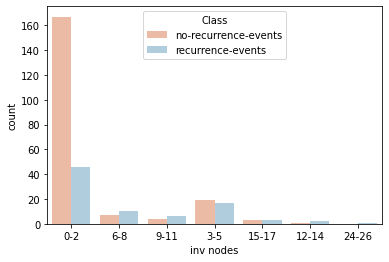

In [ ]:

plt.figure()
sns.countplot(x='inv nodes', hue='Class', data=breast_cancer, palette='RdBu')
plt.show()

El atributo de edad muestra una alta no recurrencia para los rangos entre 30 y 69 años, mientras que el de inv nodes muestra que es muy probable que entre 0 y 2 no exista recurrencia, se trabaja con esas graficas dado que las de menopausia y tamaño del tumor tienen una distribuvion mas equitativa para ambos tipos de clase.



## *Técnica de sustitución de valores faltantes *

Como se menciona previamente en la columna de node caps se encuentran valores faltantes, se sustituyen los "?" por  Nan y posteriormente se deciden eliminar

In [9]:
breast_cancer.replace(to_replace='?', value = np.nan, inplace = True)

In [10]:
pd.unique(breast_cancer['node caps'])

array(['no', 'yes', nan], dtype=object)

Notese que ahora efectivamente aparecen nan y no signos de ?

In [11]:
breast_cancer= breast_cancer.dropna()

In [12]:
pd.unique(breast_cancer['node caps'])

array(['no', 'yes'], dtype=object)

Aca se han eliminado los datos que presentaban nan

# Tecnica de deteccion y eliminación de outliers 

Para la siguiente sección se añade una columna de testing con numeros aleatorios entre 0 y 100